In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.graphics.api as smg
import statsmodels.api as sm

In [5]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

In [6]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
df.drop(columns=['track_id'])

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


In [8]:
df.shape

(232725, 18)

Checking if there are any missing values in the data

In [9]:
df.isnull().values.any()

False

In [10]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [22]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [27]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


In [29]:
numerical = ['popularity','acousticness','danceability','duration_ms','energy',
             'instrumentalness','liveness','loudness','speechiness','tempo','valence']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c38883ac8>,
      dtype=object)

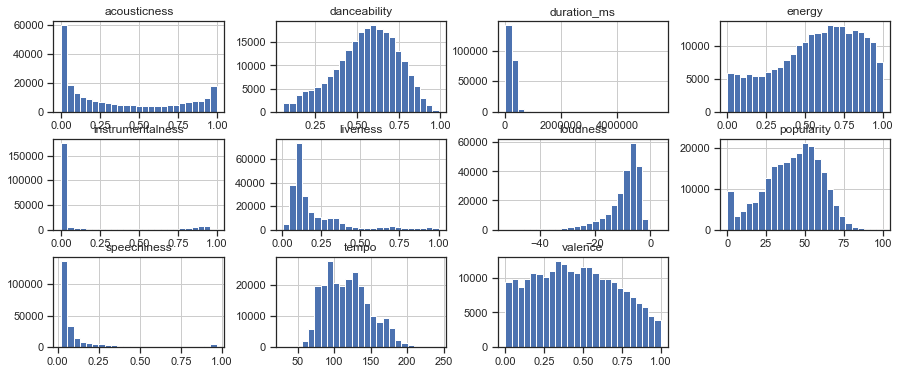

In [32]:
data[numerical].hist(bins=25, figsize=(15, 6), layout=(3, 4))

In [12]:
sample_data = df.sample(n = 200)

In [13]:
sample_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
189715,Ska,Screeching Weasel,I Was A High School Psychopath,5fKAmdtOvRJWsWomo2KGXn,22,0.000463,0.554,127943,0.90600,0.000000,A,0.3110,-4.032,Minor,0.0372,112.057,4/4,0.8020
48969,Blues,Widespread Panic,Porch Song,0ZdEbHXX0kQmS9pnxgeB86,31,0.003760,0.259,457560,0.94200,0.567000,C,0.7630,-7.963,Major,0.0813,104.631,4/4,0.1550
123509,Classical,Lera Auerbach,"24 Preludes For Violin And Piano, Op.46: 15. A...",6b0oZ8TjWHquXZs8YMQZet,38,0.684000,0.175,96680,0.00221,0.000043,G#,0.0897,-41.744,Major,0.0445,70.460,5/4,0.0458
18072,Dance,MIKA,Happy Ending,1wl3u4FrzcuBv2LQ97Z6TQ,49,0.554000,0.553,276000,0.45300,0.000000,C#,0.2230,-8.164,Major,0.0319,96.032,4/4,0.3960
74017,Children's Music,Kimbo Children's Music,"The ""Oh Dear"" Boogie (Moderate 4/4)",46NWPq1L00JLoMVlubNsJV,0,0.951000,0.664,149373,0.31300,0.946000,F,0.0910,-13.074,Major,0.0342,77.037,4/4,0.8390


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c39b52f98>,
      dtype=object)

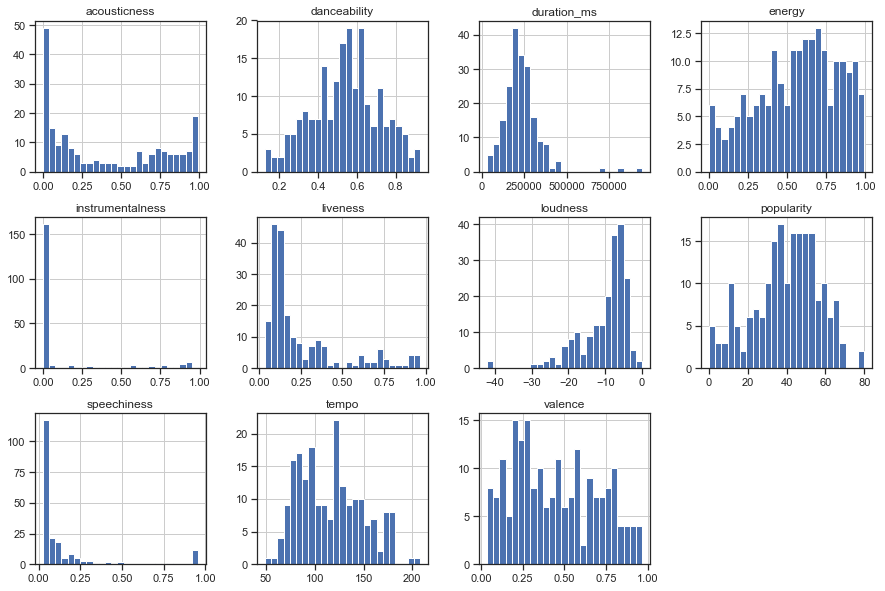

In [35]:
sample_data[numerical].hist(bins=25, figsize=(15,10), layout=(3, 4))

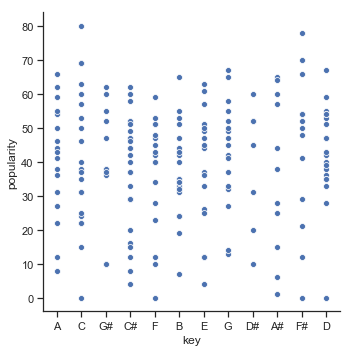

In [14]:
sns.relplot(x="key", y="popularity", data=sample_data)

In [39]:
df['artist_name'].value_counts()

Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
Wolfgang Amadeus Mozart      800
Randy Newman                 757
Georges Bizet                701
Juice Music                  684
Johann Sebastian Bach        632
Ludwig van Beethoven         596
Hans Zimmer                  559
Gioachino Rossini            491
Chorus                       480
Howard Shore                 479
Drake                        477
Henri Salvador               474
John Williams                450
Frédéric Chopin              436
Alan Menken                  420
Chris Brown                  392
Bob Marley & The Wailers     380
Dorothée                     378
Gaetano Donizetti            377
Children Songs Company       371
Max Richter                  365
Capcom Sound Team            326
Future                       317
Yuki Hayashi                 309
Sublime                      306
          

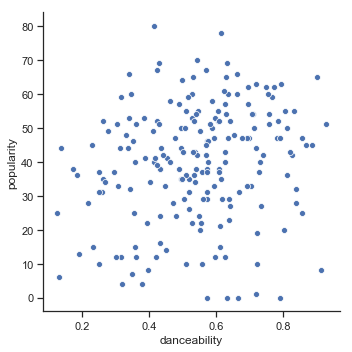

In [15]:
sns.relplot(x="danceability", y="popularity", data=sample_data)

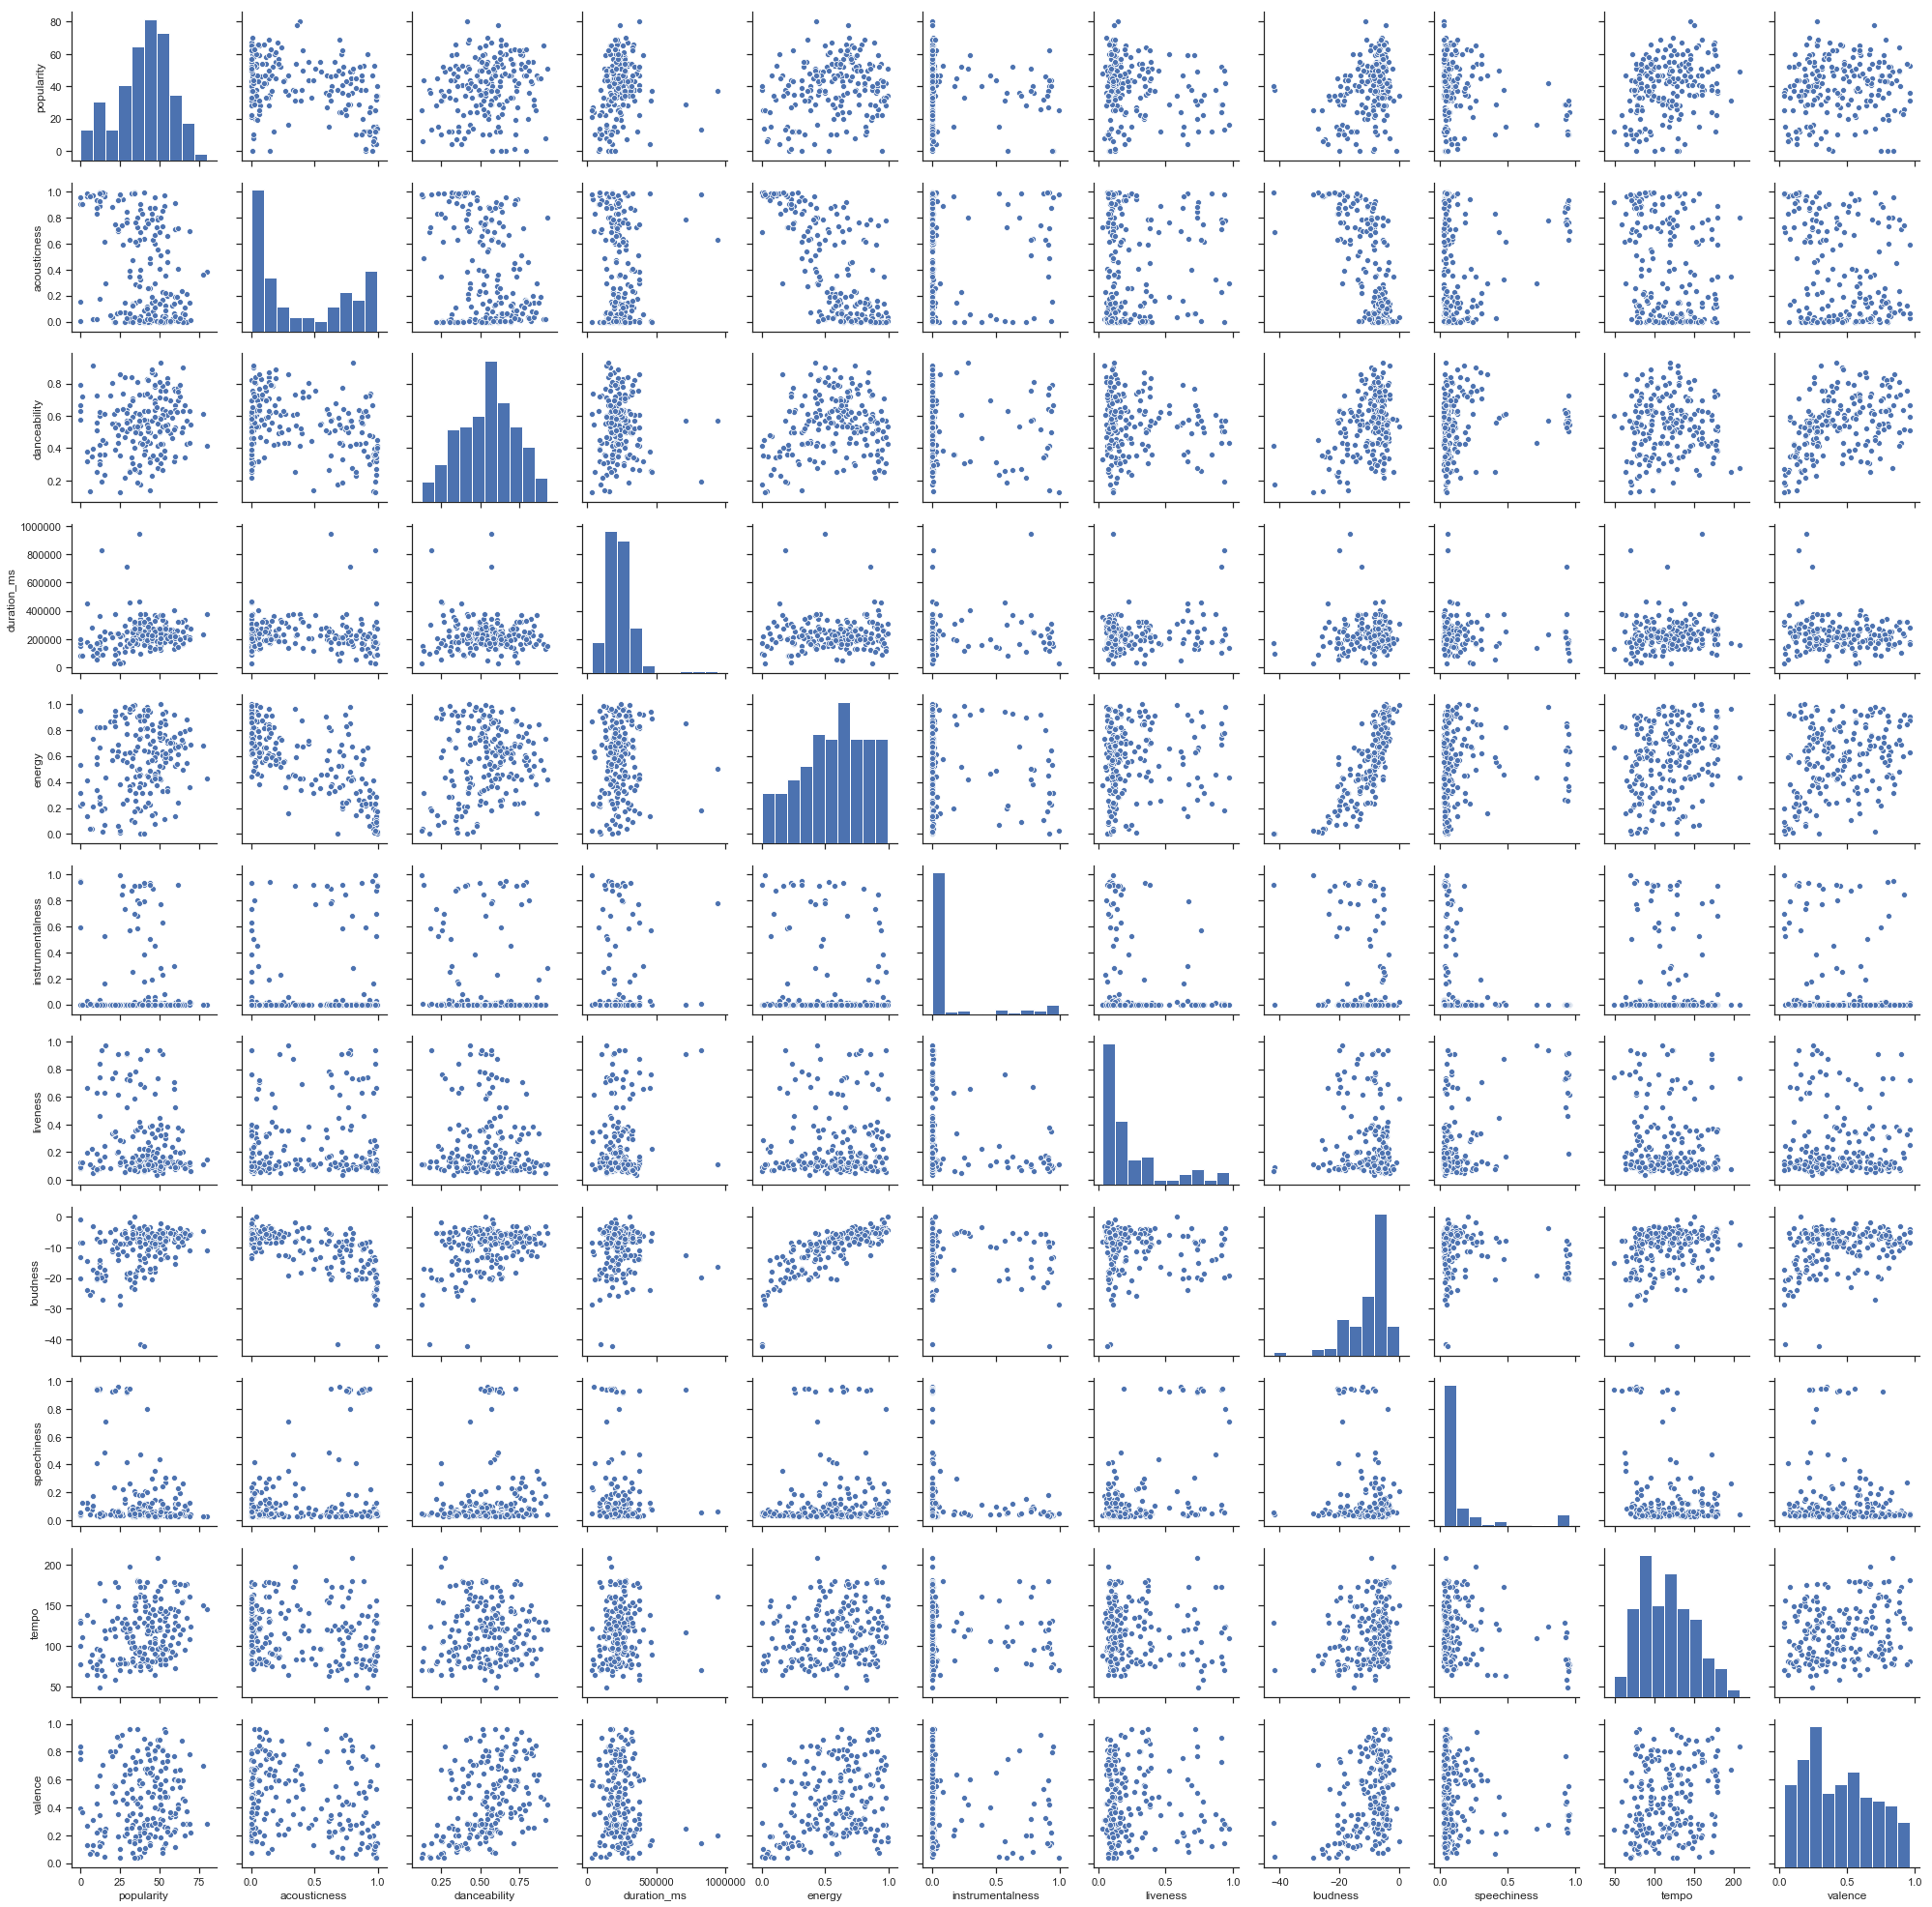

In [19]:
sns.pairplot(sample_data)

In [ ]:
g = sns.FacetGrid(sample_data, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);